# 2022 Congressional elections: effect of candidate gender

Excluding uncontested seats

In [1]:
import seaborn as sns

import gender

In [2]:
# load data
results_congress, results_congress_with_fec, _ = gender.load_required_data()
args_for_plot = dict(x='votePctPres', y='votePct', hue='isF', palette=('blue', 'red'))

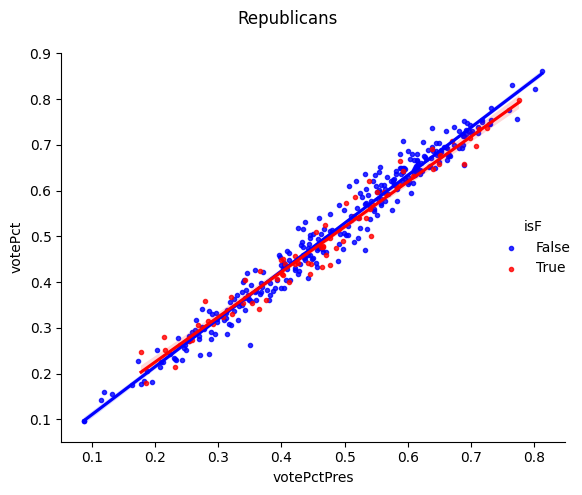

In [3]:
plot = sns.lmplot(data=results_congress[results_congress.party == 'R'], markers='.', **args_for_plot)
plot.fig.suptitle('Republicans')
plot.fig.tight_layout()

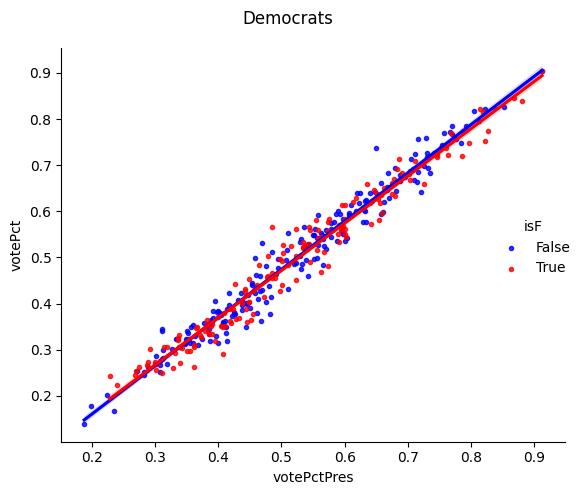

In [4]:
plot = sns.lmplot(data=results_congress[results_congress.party == 'D'], markers='.', **args_for_plot)
plot.fig.suptitle('Democrats')
plot.fig.tight_layout()

## Per below, no statistically significant difference in performance

When taking into account party and incumbency

In [5]:
gender.fit_model(results_congress, 'votePctDiff ~ party * isIncumbent * isF')

                            OLS Regression Results                            
Dep. Variable:            votePctDiff   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.33e-111
Time:                        16:45:14   Log-Likelihood:                 1634.7
No. Observations:                 753   AIC:                            -3253.
Df Residuals:                     745   BIC:                            -3216.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Also no difference after taking into account campaign spending

Disbursements (not third-party spending)

In [6]:
gender.fit_model(results_congress_with_fec, 'votePctDiff ~ party * disb * isF')

                            OLS Regression Results                            
Dep. Variable:            votePctDiff   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     94.87
Date:                Sat, 13 May 2023   Prob (F-statistic):           5.38e-97
Time:                        16:45:19   Log-Likelihood:                 1515.7
No. Observations:                 706   AIC:                            -3015.
Df Residuals:                     698   BIC:                            -2979.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         